In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
data = pd.read_csv("winequality-white-index.csv")
df = pd.DataFrame(data)
# data.shape

In [3]:
print(data.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


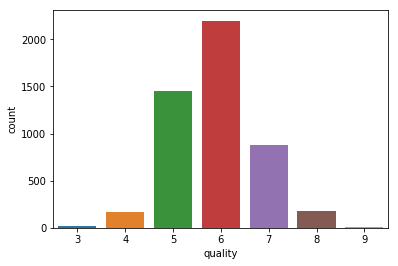

In [4]:
sns.countplot(x='quality', data=data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
index                   4898 non-null int64
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


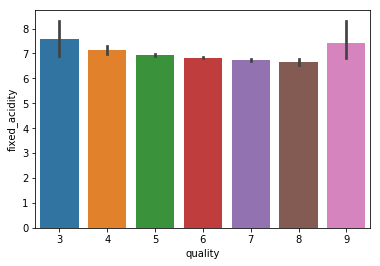

In [6]:
sns.barplot(x='quality', y='fixed_acidity' ,data=data)

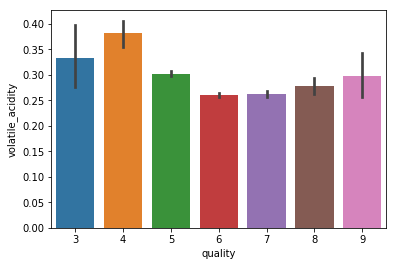

In [7]:
sns.barplot(x='quality', y='volatile_acidity' ,data=data)

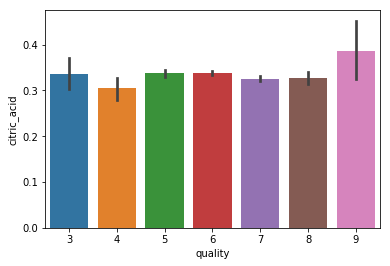

In [8]:
sns.barplot(x='quality',y='citric_acid',data=data)

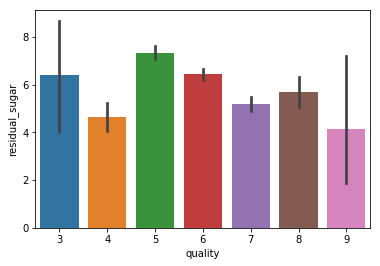

In [9]:
sns.barplot(x='quality', y='residual_sugar' ,data=data)

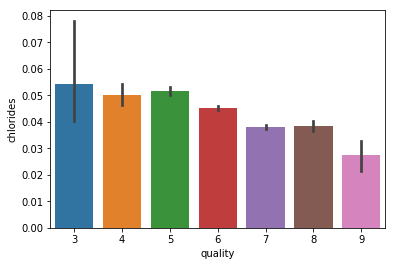

In [10]:
sns.barplot(x='quality', y='chlorides' ,data=data)

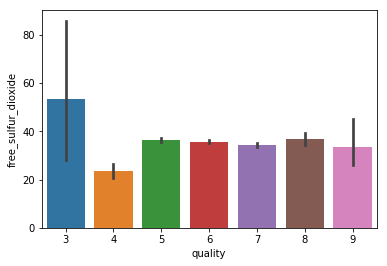

In [11]:
sns.barplot(x='quality', y='free_sulfur_dioxide' ,data=data)

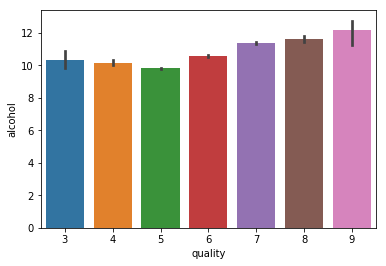

In [12]:
sns.barplot(x='quality', y='alcohol' ,data=data)

In [13]:
print(data.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


In [14]:
# bins = (2, 6.5, 8)
# group_names = ['bad', 'good']
# wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
data = pd.read_csv('winequality-white-index.csv')
df = pd.DataFrame(data)
# print(df)
df.insert(1,'label',np.ones([len(data)]),allow_duplicates=True)
df.loc[df.quality >= 7,'label'] = 2
df.loc[df.quality <= 5,'label'] = 0
df.loc[df.quality == 6,'label'] = 1

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
# label_quality=LabelEncoder()
# wine['quality']=label_quality.fit_transform(wine['quality'])

In [17]:
print(data.groupby('label').size())

label
0.0    1640
1.0    2198
2.0    1060
dtype: int64


In [18]:
X=data.drop('quality',axis=1)
y=data['quality']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=66)

In [19]:
all_vals = data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

In [20]:

from collections import Counter
def KnnClassifier(x_test,x_train, y_train, K):
    pred_labels = []
    for i in range(len(x_test)):
        dist = []
        for j in range(len(y_train)):
            d = 0
            for n in range(0,11):
                d = d + (x_train[j,n]-x_test[i,n])**2
            d = np.sqrt(d)
            dist.append(d)
        neighbors = []
        for count in range(K):
            ind = np.where(dist == (min(dist)))[0]
            ind = ind[0]
            neighbors.append(int(y_train[ind]))
            del dist[ind]
        mode = Counter(neighbors).most_common(1)
        pred_labels.append(mode[0][0])
    return pred_labels

In [28]:
X=data.drop('quality',axis=1)
y=data['quality']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=66)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_setting= range(1,51)


df1 = x_test
x_test = df1[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values

# print(x_test)
df2 = x_train
x_train = df2[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values

# print(y_train)
# pred_labels=KnnClassifier(x_test,x_train, y_train, K = 1)
# knn.fit(x_train,y_train)
# print(knn.score(x_train,y_train))
# print(knn.score(x_test,y_test))
# training_accuracy.append(knn.score(x_train,y_train))
# testing_accuracy.append(knn.score(x_test,y_test))

for n_neighbors in neighbors_setting:
#     knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    pred_labels=KnnClassifier(x_test,x_train, y_train, K = n_neighbors)
    
    pred_labels.fit(x_train,y_train)
#     print(knn.score(x_train,y_train))
#     print(knn.score(x_test,y_test))
    training_accuracy.append(pred_labels.score(x_train,y_train))
    testing_accuracy.append(pred_labels.score(x_test,y_test))


plt.plot(neighbors_setting,training_accuracy,label='training')
plt.plot(neighbors_setting,testing_accuracy,label='testing')
plt.legend()
plt.xlabel('neighbors_setting')
plt.ylabel('accuracy')
plt.show()


AttributeError: 'list' object has no attribute 'fit'

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('Accuracy of K-nn classifier on training set:{:}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-nn classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))